In [3]:
%%bigquery df

SELECT
	CASE
WHEN distribution_centers.name = "São José dos Campos" THEN '00'
WHEN distribution_centers.name = "Sorocaba" THEN '00'
WHEN distribution_centers.name = "Campinas" THEN '00'
WHEN distribution_centers.name = "Jundiaí" THEN '00'
WHEN distribution_centers.name = "Santos" THEN '00'
WHEN distribution_centers.name = "Ribeirao Preto" THEN '00'
WHEN distribution_centers.name = "Porto Alegre" THEN '01'
WHEN distribution_centers.name = "Curitiba" THEN '01'
WHEN distribution_centers.name = "Recife" THEN '02'
WHEN distribution_centers.name = "Salvador" THEN '02'
WHEN distribution_centers.name = "Fortaleza" THEN '02'
WHEN distribution_centers.name = "Brasilia" THEN '03'
WHEN distribution_centers.name = "Belo Horizonte" THEN '00'
WHEN distribution_centers.name = "Goiania" THEN '03'
WHEN distribution_centers.name = "Mourato" THEN '04'
WHEN distribution_centers.name = "Copacabana" THEN '05'
WHEN distribution_centers.name = "Florianópolis" THEN '01'

END AS distribution_centers_region__sort_,
	CASE
WHEN distribution_centers.name = "São José dos Campos" THEN 'Others Southeast'
WHEN distribution_centers.name = "Sorocaba" THEN 'Others Southeast'
WHEN distribution_centers.name = "Campinas" THEN 'Others Southeast'
WHEN distribution_centers.name = "Jundiaí" THEN 'Others Southeast'
WHEN distribution_centers.name = "Santos" THEN 'Others Southeast'
WHEN distribution_centers.name = "Ribeirao Preto" THEN 'Others Southeast'
WHEN distribution_centers.name = "Porto Alegre" THEN 'South'
WHEN distribution_centers.name = "Curitiba" THEN 'South'
WHEN distribution_centers.name = "Recife" THEN 'Northeast'
WHEN distribution_centers.name = "Salvador" THEN 'Northeast'
WHEN distribution_centers.name = "Fortaleza" THEN 'Northeast'
WHEN distribution_centers.name = "Brasilia" THEN 'Midwest'
WHEN distribution_centers.name = "Belo Horizonte" THEN 'Others Southeast'
WHEN distribution_centers.name = "Goiania" THEN 'Midwest'
WHEN distribution_centers.name = "Mourato" THEN 'Mourato'
WHEN distribution_centers.name = "Copacabana" THEN 'Copacabana'
WHEN distribution_centers.name = "Florianópolis" THEN 'South'

END AS distribution_centers_region,
	CASE
WHEN distribution_centers.name = "Campinas" OR
        distribution_centers.name = "Jundiaí" OR
        distribution_centers.name = "Fortaleza" OR
        distribution_centers.name = "Recife" OR
        distribution_centers.name = "Copacabana" OR
        distribution_centers.name = "Salvador" OR
        distribution_centers.name = "Santos" THEN '0'
WHEN distribution_centers.name = "Belo Horizonte" OR
        distribution_centers.name = "Brasilia" OR
        distribution_centers.name = "Curitiba" OR
        distribution_centers.name = "Florianópolis" OR
        distribution_centers.name = "Goiania" OR
        distribution_centers.name = "Ribeirao Preto" OR
        distribution_centers.name = "Porto Alegre"  THEN '1'
WHEN distribution_centers.name = "Mourato" OR
        distribution_centers.name = "São José dos Campos" OR
        distribution_centers.name = "Sorocaba" THEN '2'

END AS distribution_centers_logistic_regional__sort_,
	CASE
WHEN distribution_centers.name = "Campinas" OR
        distribution_centers.name = "Jundiaí" OR
        distribution_centers.name = "Fortaleza" OR
        distribution_centers.name = "Recife" OR
        distribution_centers.name = "Copacabana" OR
        distribution_centers.name = "Salvador" OR
        distribution_centers.name = "Santos" THEN 'Litoral'
WHEN distribution_centers.name = "Belo Horizonte" OR
        distribution_centers.name = "Brasilia" OR
        distribution_centers.name = "Curitiba" OR
        distribution_centers.name = "Florianópolis" OR
        distribution_centers.name = "Goiania" OR
        distribution_centers.name = "Ribeirao Preto" OR
        distribution_centers.name = "Porto Alegre"  THEN 'Interior'
WHEN distribution_centers.name = "Mourato" OR
        distribution_centers.name = "São José dos Campos" OR
        distribution_centers.name = "Sorocaba" THEN 'São Paulo'

END AS distribution_centers_logistic_regional,
	distribution_centers.name  AS distribution_centers_name,
	CAST(CAST(slots.slot_date  AS TIMESTAMP) AS DATE) AS slots_slot_date,
	slots.period  AS slots_period,
	slots.slots_available  AS slots_slots_available,
	slots.slots_used  AS slots_slots_used,
	CASE WHEN slots.is_slot_full  THEN 'Yes' ELSE 'No' END
 AS slots_is_slot_full,
	CASE WHEN slots.is_locked_period  THEN 'Yes' ELSE 'No' END
 AS slots_is_locked_period
FROM livup-bigdata.ecom_master.slots  AS slots
LEFT JOIN ecom_master.distribution_centers  AS distribution_centers ON distribution_centers.distribution_center_id = slots.distribution_center_id

WHERE ((((slots.slot_date ) >= (DATE(TIMESTAMP_TRUNC(CAST(TIMESTAMP('2020-01-30 00:00:00') AS TIMESTAMP), DAY))) AND (slots.slot_date ) < (DATE(TIMESTAMP_TRUNC(CAST(TIMESTAMP('2020-09-14 00:00:00') AS TIMESTAMP), DAY)))))) AND ((UPPER(distribution_centers.name ) = UPPER('Mourato')))
GROUP BY 1,2,3,4,5,6,7,8,9,10,11
ORDER BY 6 DESC

In [4]:
%%bigquery dff

SELECT * FROM (
SELECT *, DENSE_RANK() OVER (ORDER BY z___min_rank) as z___pivot_row_rank, RANK() OVER (PARTITION BY z__pivot_col_rank ORDER BY z___min_rank) as z__pivot_col_ordering, CASE WHEN z___min_rank = z___rank THEN 1 ELSE 0 END AS z__is_highest_ranked_cell FROM (
SELECT *, MIN(z___rank) OVER (PARTITION BY CAST(sales_created_at_date AS STRING)) as z___min_rank FROM (
SELECT *, RANK() OVER (ORDER BY sales_created_at_date DESC, z__pivot_col_rank) AS z___rank FROM (
SELECT *, DENSE_RANK() OVER (ORDER BY CASE WHEN distribution_centers_name IS NULL THEN 1 ELSE 0 END, distribution_centers_name) AS z__pivot_col_rank FROM (
SELECT
	distribution_centers.name  AS distribution_centers_name,
	CAST(TIMESTAMP(FORMAT_TIMESTAMP('%F %H:%M:%E*S', sales.created_at , 'America/Sao_Paulo')) AS DATE) AS sales_created_at_date,
	AVG(sales.billing_total_payment ) AS sales_average_order_size
FROM ecom_master.sales  AS sales
LEFT JOIN ecom_master.distribution_centers  AS distribution_centers ON sales.distribution_center_id = distribution_centers.distribution_center_id

WHERE ((((sales.created_at ) >= (TIMESTAMP(FORMAT_TIMESTAMP('%F %H:%M:%E*S', TIMESTAMP('2018-02-01 00:00:00')), 'America/Sao_Paulo')) AND (sales.created_at ) < (TIMESTAMP(FORMAT_TIMESTAMP('%F %H:%M:%E*S', TIMESTAMP('2020-09-14 00:00:00')), 'America/Sao_Paulo'))))) AND sales.valid_sale
GROUP BY 1,2
HAVING
	(AVG(sales.billing_total_payment ) > 10)) ww
) bb WHERE z__pivot_col_rank <= 16384
) aa
) xx
) zz
 WHERE (z__pivot_col_rank <= 50 OR z__is_highest_ranked_cell = 1) AND (z___pivot_row_rank <= 500 OR z__pivot_col_ordering = 1) ORDER BY z___pivot_row_rank

In [5]:
%%bigquery df2

WITH picking_output AS (
  SELECT EXTRACT(DATE FROM transaction.updated_at) AS picking_date, location AS distribution_center_id, item_id, ABS(SUM(quantity)) AS picking_quantity
  FROM `livup-bigdata.livup_master.inventory_transactions_realtime` AS transaction
  WHERE
    transaction.updated_at BETWEEN '2020-02-01' AND '2020-09-14'
    AND transaction_kind = 'sale' 
    AND status = 'done'
  GROUP BY 1, 2, 3
  
)
SELECT demand_date, cds.name AS distribution_center, item.sku, item.name AS item_name, reference_date AS `date_model_was_Executed`, COALESCE(picking_output.picking_quantity, 0) AS picking_quantity, quantile_50, quantile_90, quantile_95, quantile_98, quantile_99,  std_error, std_demand
FROM `livup-bigdata.models_monitoring.item_demand_distribution_center` AS item_demand
LEFT JOIN `livup-bigdata.ecom_master.items` AS item USING (item_id)
LEFT JOIN `livup-bigdata.ecom_master.distribution_centers` AS cds USING (distribution_center_id)
LEFT JOIN picking_output ON 
  picking_output.distribution_center_id = item_demand.distribution_center_id AND 
  picking_output.item_id = item_demand.item_id AND 
  item_demand.demand_date = picking_output.picking_date
WHERE
DEMAND_DATE BETWEEN '2020-02-01' AND '2020-09-14'
ORDER BY demand_date DESC

In [6]:
%%bigquery qtl_50

-- raw sql results do not include filled-in values for 'item_demand_distribution_center.demand_date'


SELECT
	CAST(CAST(item_demand_distribution_center.demand_date  AS TIMESTAMP) AS DATE) AS item_demand_distribution_center_demand_date,
	COALESCE(SUM(item_demand_distribution_center.demand ), 0) AS item_demand_distribution_center_sum_demand,
	COALESCE(SUM(item_demand_distribution_center.quantile_50 ), 0) AS item_demand_distribution_center_sum_demand_forecast,
	COALESCE(SUM(item_demand_distribution_center.quantile_50 ), 0) AS item_demand_distribution_center_sum_demand_forecast_quantile_50,
	COALESCE(SUM(item_demand_distribution_center.quantile_90 ), 0) AS item_demand_distribution_center_sum_demand_forecast_quantile_90,
	COALESCE(SUM(item_demand_distribution_center.quantile_95 ), 0) AS item_demand_distribution_center_sum_demand_forecast_quantile_95,
	COALESCE(SUM(item_demand_distribution_center.quantile_98 ), 0) AS item_demand_distribution_center_sum_demand_forecast_quantile_98,
	COALESCE(SUM(item_demand_distribution_center.quantile_50_with_campaign_effect ), 0) AS item_demand_distribution_center_sum_demand_forecast_quantile_50_campaign_effect
FROM livup-bigdata.models_monitoring.item_demand_distribution_center  AS item_demand_distribution_center
LEFT JOIN ecom_master.distribution_centers  AS distribution_centers ON item_demand_distribution_center.distribution_center_id = distribution_centers.distribution_center_id

WHERE ((((item_demand_distribution_center.demand_date ) >= (DATE(TIMESTAMP_TRUNC(CAST(TIMESTAMP('2020-08-31 00:00:00') AS TIMESTAMP), DAY))) AND (item_demand_distribution_center.demand_date ) < (DATE(TIMESTAMP_TRUNC(CAST(TIMESTAMP('2020-10-14 00:00:00') AS TIMESTAMP), DAY)))))) AND (distribution_centers.name = 'Mourato')
GROUP BY 1
ORDER BY 1 DESC

In [7]:
%%bigquery meta_liv

WITH daily_sales AS (SELECT
        CAST(DATETIME(created_at, "America/Sao_Paulo") AS DATE) as date,
        distribution_center_name,
        SUM(CASE WHEN (valid_sale IS TRUE AND user_order_number = 1) THEN billing_total_payment ELSE 0 END) as total_revenue_valid_sale_first_buy,
        SUM(CASE WHEN (valid_sale IS TRUE AND user_order_number > 1) THEN billing_total_payment ELSE 0 END) as total_revenue_valid_sale_rebuy,
        SUM(CASE WHEN valid_sale IS TRUE THEN billing_total_payment ELSE 0 END) as total_revenue_valid_sale,
        SUM(CASE WHEN valid_sale_with_pending_payments IS TRUE THEN billing_total_payment ELSE 0 END) as total_revenue_valid_sale_with_pending_payments
      FROM
        ecom_master.sales
      GROUP BY
        1,
        2)
SELECT
	CAST(TIMESTAMP (daily_goals.date, "America/Sao_Paulo")  AS DATE) AS daily_goals_date_date,
	COALESCE(SUM(daily_goals.revenue_total ), 0) AS daily_goals_revenue_goal,
	COALESCE(SUM(daily_sales.total_revenue_valid_sale ), 0) AS daily_sales_total_revenue_goal
FROM ecom_master.daily_goals  AS daily_goals
LEFT JOIN daily_sales ON (CONCAT(CAST(daily_goals.date AS STRING), ' ', daily_goals.distribution_center)) = (CONCAT(CAST(daily_sales.date AS STRING), ' ', daily_sales.distribution_center_name))

WHERE ((((TIMESTAMP (daily_goals.date, "America/Sao_Paulo") ) >= (TIMESTAMP('2020-08-31 00:00:00')) AND (TIMESTAMP (daily_goals.date, "America/Sao_Paulo") ) < (TIMESTAMP('2020-09-28 00:00:00'))))) AND ((UPPER(daily_goals.distribution_center ) = UPPER('Mourato')))
GROUP BY 1
ORDER BY 1 DESC

In [8]:
%%bigquery df_1

SELECT
	CAST(TIMESTAMP(FORMAT_TIMESTAMP('%F %H:%M:%E*S', sales.created_at , 'America/Sao_Paulo')) AS DATE) AS sales_created_at_date,
	distribution_centers.name  AS distribution_centers_name,
	(COALESCE(SUM((-sales.billing_total_discount)), 0))/(COALESCE(SUM(sales.billing_subtotal ), 0)) AS sales_average_discount
FROM ecom_master.sales  AS sales
LEFT JOIN ecom_master.distribution_centers  AS distribution_centers ON sales.distribution_center_id = distribution_centers.distribution_center_id

WHERE ((((sales.created_at ) >= (TIMESTAMP(FORMAT_TIMESTAMP('%F %H:%M:%E*S', TIMESTAMP('2020-02-01 00:00:00')), 'America/Sao_Paulo')) AND (sales.created_at ) < (TIMESTAMP(FORMAT_TIMESTAMP('%F %H:%M:%E*S', TIMESTAMP('2020-09-14 00:00:00')), 'America/Sao_Paulo'))))) AND sales.valid_sale
GROUP BY 1,2
ORDER BY 1 DESC

In [9]:
# -- importando libs
#bibliotecas usada no estudo
import calendar
from datetime import timedelta, datetime,  date
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import numpy as np
import pandas as pd
from receita import mourato_receita
from scipy import stats
from scipy.stats import linregress
from scipy.stats import normaltest
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

In [53]:
# -- DATASET SLOTS

# -- criando um novo dataset só com as colunas que precisamos (dataset-slots)
sp = df[['distribution_centers_name', 'slots_slot_date', 'slots_period', 'slots_slots_used' ]]

# -- classificando as feature datetime do dataframe mourato_1 (dataset-slots)
sp['slots_slot_date'] = pd.to_datetime(sp['slots_slot_date'])

# -- agrupando os slots para passar de periodos (manhã, tarde e noite) para dia
sp_2 = sp['slots_slots_used'].groupby(sp['slots_slot_date']).sum()

# passando de series para dataframe
mourato = sp_2.to_frame().reset_index()

#  -- filtrando por datas o dataset sp através de uma função

def filter_by_date(ds, start_date, end_date):
    
    start_date_parsed = datetime.strptime(start_date, "%Y-%m-%d") 
    start_end_parsed = datetime.strptime(end_date, "%Y-%m-%d")
    
    return ds[(ds['slots_slot_date'] >= start_date_parsed) & (ds['slots_slot_date'] <= start_end_parsed)]


# -- dataset de fevereiro a agosto devido a limitação de dados do slots
mourato_2 = filter_by_date(mourato, '2020-02-01', '2020-09-13')

# -- ordenando os dados do mais recente para o mais antigo e criando um novo Dataset
mourato_slots = mourato_2.sort_values(by = 'slots_slot_date', ascending=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [54]:

# -- DATASET TM
# -- dropando algumas colunas que não iremos usar
tm = dff.drop(['z__pivot_col_rank', 'z___rank',
       'z___min_rank', 'z___pivot_row_rank', 'z__pivot_col_ordering',
       'z__is_highest_ranked_cell'], axis = 1)

# -- criando um dataframe só com o CD-SP (Mourato)
sp = tm[tm['distribution_centers_name'] == 'Mourato']

# -- classificando as feature datetime do dataframe sp
sp['sales_created_at_date'] = pd.to_datetime(sp['sales_created_at_date'])

# -- passando a coluna CD do mourato_tm para categórica
sp['distribution_centers_name'] = sp['distribution_centers_name'].astype('category')

# -- criando e ordenando as colunas no novo datraframe
mourato = sp[['sales_created_at_date', 'distribution_centers_name', 'sales_average_order_size']]

#  -- filtrando por datas o dataset sp através de uma função

def filter_by_date(ds, start_date, end_date):
    
    start_date_parsed = datetime.strptime(start_date, "%Y-%m-%d") 
    start_end_parsed = datetime.strptime(end_date, "%Y-%m-%d")
    
    return ds[(ds['sales_created_at_date'] >= start_date_parsed) & (ds['sales_created_at_date'] <= start_end_parsed)]


# -- dataset de fevereiro a agosto devido a limitação de dados do slots
mourato_tm = filter_by_date(mourato, '2020-02-01', '2020-09-13')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
# -- DATASET PICKING

# -- criando um dataframe só com o CD-SP (Mourato)
sp = df2[df2['distribution_center'] == 'Mourato']

# -- dataset antigo
#sp_2 = sp[['demand_date', 'sku', 'item_name', 'picking_quantity']]

# -- criando um novo dataset somente com as features de interesse
sp_2 = sp[['demand_date', 'sku', 'item_name', 'picking_quantity']]

# -- dataset antigo
#sp_3 = sp['picking_quantity'].groupby(sp['demand_date']).sum().to_frame().reset_index().sort_values(by = ['demand_date'], ascending = False)


# -- fazendo um groupby para agruparmos os dias de picking, transformando em dataframe e reordenando as datas da mais recente para a mais antiga
sp_3 = sp['picking_quantity'].groupby(sp['demand_date']).sum().to_frame().reset_index().sort_values(by = ['demand_date'], ascending = False)

# -- classificando as features categoricas e datetime do dataframe sp
sp_3['demand_date'] = pd.to_datetime(sp_3['demand_date'])

#  -- filtrando por datas o dataset sp através de uma função

def filter_by_date(ds, start_date, end_date):
    
    start_date_parsed = datetime.strptime(start_date, "%Y-%m-%d") 
    start_end_parsed = datetime.strptime(end_date, "%Y-%m-%d")
    
    return ds[(ds['demand_date'] >= start_date_parsed) & (ds['demand_date'] <= start_end_parsed)]


# -- dataset de fevereiro a agosto devido a limitação de dados do slots
mourato_picking = filter_by_date(sp_3, '2020-02-01', '2020-09-13')

In [56]:
# -- DATASET DESCONTO

# -- criando um dataframe só com o CD-SP (Mourato)
sp = df_1[df_1['distribution_centers_name'] == 'Mourato']

# -- classificando as feature datetime do dataframe sp
sp['sales_created_at_date'] = pd.to_datetime(sp['sales_created_at_date'])

#  -- filtrando por datas o dataset sp através de uma função

def filter_by_date(ds, start_date, end_date):
    
    start_date_parsed = datetime.strptime(start_date, "%Y-%m-%d") 
    start_end_parsed = datetime.strptime(end_date, "%Y-%m-%d")
    
    return ds[(ds['sales_created_at_date'] >= start_date_parsed) & (ds['sales_created_at_date'] <= start_end_parsed)]


# -- dataset de fevereiro a agosto devido a limitação de dados do slots
mourato = filter_by_date(sp, '2020-02-01', '2020-09-13')

# criando um novo dataset só com as features de interesse
mourato_desconto_1 = mourato[['sales_created_at_date', 'distribution_centers_name', 'sales_average_discount']]

# -- dropando a coluna de distribution_centers_name
mourato_desconto = mourato_desconto_1.drop(['distribution_centers_name'], axis = 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [57]:
# -- dataset antigo 
#mourato_picking = mourato_picking.rename(columns={'demand_date': 'data', 'picking_quantity': 'picking'})

# -- ajustanto os nomes das features nos datasets 
mourato_receita = mourato_receita.rename(columns={'daily_goals_revenue_total': 'receita_meta', 'sales_total_revenue': 'receita_real'})
mourato_slots = mourato_slots.rename(columns={'slots_slot_date': 'data', 'slots_slots_used': 'slots_usado'})
mourato_tm = mourato_tm.rename(columns={'sales_created_at_date': 'data', 'distribution_centers_name': 'CD', 'sales_average_order_size': 'TM' })
mourato_picking = mourato_picking.rename(columns={'demand_date': 'data', 'picking_quantity': 'picking'})
mourato_desconto = mourato_desconto.rename(columns={'sales_created_at_date': 'data', 'sales_average_discount': 'desconto'})

# -- mergeando os Datasets de tm e receita e criando um novo dataset mourato_1
mourato_1 = pd.merge(mourato_tm, mourato_receita[["data", "receita_meta", "receita_real"]], on = "data")

# -- mergeando o mourato_1 com o dataset de slots e criando um novo dataset mourato_ts
mourato_2 = pd.merge(mourato_1, mourato_slots[["data", "slots_usado"]], on = "data")

# -- mergeando o mourato_2 com o dataset de picing e criando um novo dataset mourato_3
mourato_3 = pd.merge(mourato_2, mourato_picking[["data", "picking"]], on = "data")

# -- mergeando o mourato_3 com o dataset de desconto e criando um novo dataset mourato_ts
mourato_ts = pd.merge(mourato_3, mourato_desconto[["data", "desconto"]], on = "data")

In [58]:
# -- transformando o dtype da feature data em datetime
mourato_ts['data'] = pd.to_datetime(mourato_ts['data'])
mourato_ts = mourato_ts.sort_values(by='data', ascending=True).reset_index().drop('index', axis=1)

In [59]:
#DATASET PREVISÕES - quantile 90

# -- classificando as feature datetime do dataframe sp
qtl_50['item_demand_distribution_center_demand_date'] = pd.to_datetime(qtl_50['item_demand_distribution_center_demand_date'])

#  -- filtrando por datas o dataset sp através de uma função

def filter_by_date(ds, start_date, end_date):
    
    start_date_parsed = datetime.strptime(start_date, "%Y-%m-%d") 
    start_end_parsed = datetime.strptime(end_date, "%Y-%m-%d")
    
    return ds[(ds['item_demand_distribution_center_demand_date'] >= start_date_parsed) & (ds['item_demand_distribution_center_demand_date'] <= start_end_parsed)]


# -- dataset de fevereiro a agosto devido a limitação de dados do slots
qtl = filter_by_date(qtl_50, '2020-09-01', '2020-09-25')

# criando um novo dataset só com as features de interesse
qtl_lv_1 = qtl[['item_demand_distribution_center_demand_date', 'item_demand_distribution_center_sum_demand_forecast_quantile_90']].reset_index()

# -- dropando a coluna de index
qtl_lv = qtl_lv_1.drop(['index'], axis = 1)

#DATASET PREVISÕES - META

# -- classificando as feature datetime do dataframe sp
meta_liv['daily_goals_date_date'] = pd.to_datetime(meta_liv['daily_goals_date_date'])

#  -- filtrando por datas o dataset sp através de uma função

def filter_by_date(ds, start_date, end_date):
    
    start_date_parsed = datetime.strptime(start_date, "%Y-%m-%d") 
    start_end_parsed = datetime.strptime(end_date, "%Y-%m-%d")
    
    return ds[(ds['daily_goals_date_date'] >= start_date_parsed) & (ds['daily_goals_date_date'] <= start_end_parsed)]


# -- dataset de fevereiro a agosto devido a limitação de dados do slots
metaa = filter_by_date(meta_liv, '2020-09-01', '2020-09-25')

# criando um novo dataset só com as features de interesse
liv_meta_1 = metaa[['daily_goals_date_date', 'daily_goals_revenue_goal']].reset_index()

# -- dropando a coluna de index
liv_meta = liv_meta_1.drop(['index'], axis = 1)

# -- MERGEANDO OS DOIS DATASETS E RENOMEANDO

liv_meta = liv_meta.rename(columns={'daily_goals_date_date': 'data', 'daily_goals_revenue_goal': 'receita_meta'})
qtl_lv = qtl_lv.rename(columns={'item_demand_distribution_center_demand_date': 'data', 'item_demand_distribution_center_sum_demand_forecast_quantile_90': 'picking'})
predicao = pd.merge(qtl_lv, liv_meta[["data", "receita_meta"]], on = "data").sort_values(by=['data'], ascending = True)

In [60]:
mourato_ts = mourato_ts.rename(columns={'slots_usado':'slots_usados'})
mourato_ts.head(3)

,data,CD,TM,receita_meta,receita_real,slots_usados,picking,desconto
0,2020-02-01,Mourato,216.544650,50374,71243.19,90.0,1558,0.075001
1,2020-02-02,Mourato,224.266213,78666,122000.82,226.0,4504,0.070600
2,2020-02-03,Mourato,203.623777,181499,223171.66,667.0,13243,0.065687


In [61]:
predicao.head(3)

,data,picking,receita_meta
24,2020-09-01,35419,260207
23,2020-09-02,34653,236456
22,2020-09-03,33702,240847


In [62]:
#Eliminando variáveis baixadas e descontinuadas do modelo
mourato_ts = mourato_ts.drop(['receita_real', 'TM', 'desconto', 'CD'], axis = 1)
#predicao[['picking', 'receita_meta']] = predicao[['picking', 'receita_meta']]
#mourato_ts[['receita_meta', 'slots_usados']] = mourato_ts[['receita_meta', 'slots_usados']]


In [63]:
predicao.head(3)

,data,picking,receita_meta
24,2020-09-01,35419,260207
23,2020-09-02,34653,236456
22,2020-09-03,33702,240847


## Após o dataset criado, hora de começar! 

In [64]:
mourato_ts.head(5)

,data,receita_meta,slots_usados,picking
0,2020-02-01,50374,90.0,1558
1,2020-02-02,78666,226.0,4504
2,2020-02-03,181499,667.0,13243
3,2020-02-04,150615,754.0,12314
4,2020-02-05,131534,716.0,13174


## Realização da EDA

In [65]:
mourato_ts.describe()

,receita_meta,slots_usados,picking
count,226.000000,226.000000,226.000000
mean,149448.278761,659.238938,15865.951327
std,63806.725883,310.013427,7937.141586
min,12183.000000,0.000000,0.000000
25%,99566.750000,387.750000,10514.000000
50%,147782.500000,748.000000,16483.000000
75%,199750.500000,945.250000,22566.250000
max,273789.000000,1099.000000,29780.000000


In [66]:
mourato_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   data          226 non-null    datetime64[ns]
 1   receita_meta  226 non-null    int64         
 2   slots_usados  226 non-null    float64       
 3   picking       226 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 7.2 KB


In [67]:
# Temos feriados? Feriados devem ter slots_usados = 0
mourato_ts.loc[mourato_ts['slots_usados'] == 0]

,data,receita_meta,slots_usados,picking
21,2020-02-22,19046,0.0,0
22,2020-02-23,12183,0.0,0
23,2020-02-24,14569,0.0,0
24,2020-02-25,40491,0.0,0
25,2020-02-26,135640,0.0,5008
69,2020-04-10,41536,0.0,162
71,2020-04-12,83562,0.0,0
80,2020-04-21,178974,0.0,986
90,2020-05-01,44738,0.0,0
131,2020-06-11,91634,0.0,985


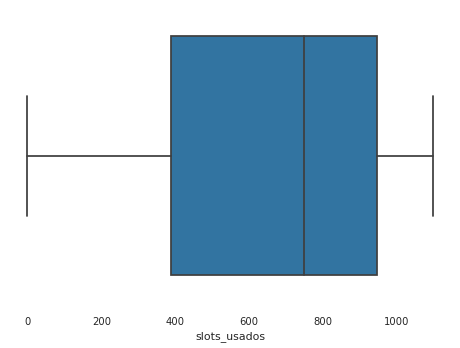

In [68]:
#fazer um boxplot para vermos como vamos tratar esses feriados (média ou mediana?), não podemos dropar, pq irá afetar a sazonalidade do modelo
sns.boxplot(x = mourato_ts['slots_usados'], sym='+', whis=1.5)

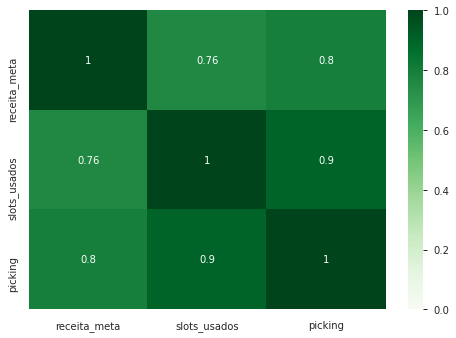

In [69]:
# -- Observando a correlação entre as features
sns.heatmap(mourato_ts.corr().round(2), annot = True, vmin = 0, vmax = 1, cmap='Greens')
#Uma observação aqui é que não utilizamos o range de (-1,1) e sim (0,1) para poder diferenciar melhor as cores.

## Avaliando as features de acordo com suas distribuições temporais e também através das suas decomposições

In [70]:
#Definindo dtype dos numeros das features picking e receita_meta para float.
mourato_ts['receita_meta'] = mourato_ts['receita_meta'].astype('float')
mourato_ts['picking'] = mourato_ts['picking'].astype('float')
#Verificação dos dtypes
mourato_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   data          226 non-null    datetime64[ns]
 1   receita_meta  226 non-null    float64       
 2   slots_usados  226 non-null    float64       
 3   picking       226 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 7.2 KB


In [71]:
# -- Criando um dataset para realizar a decomposição temporal das variáveis
sp_ts = mourato_ts.set_index('data')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1cb8e0310>,
      dtype=object)

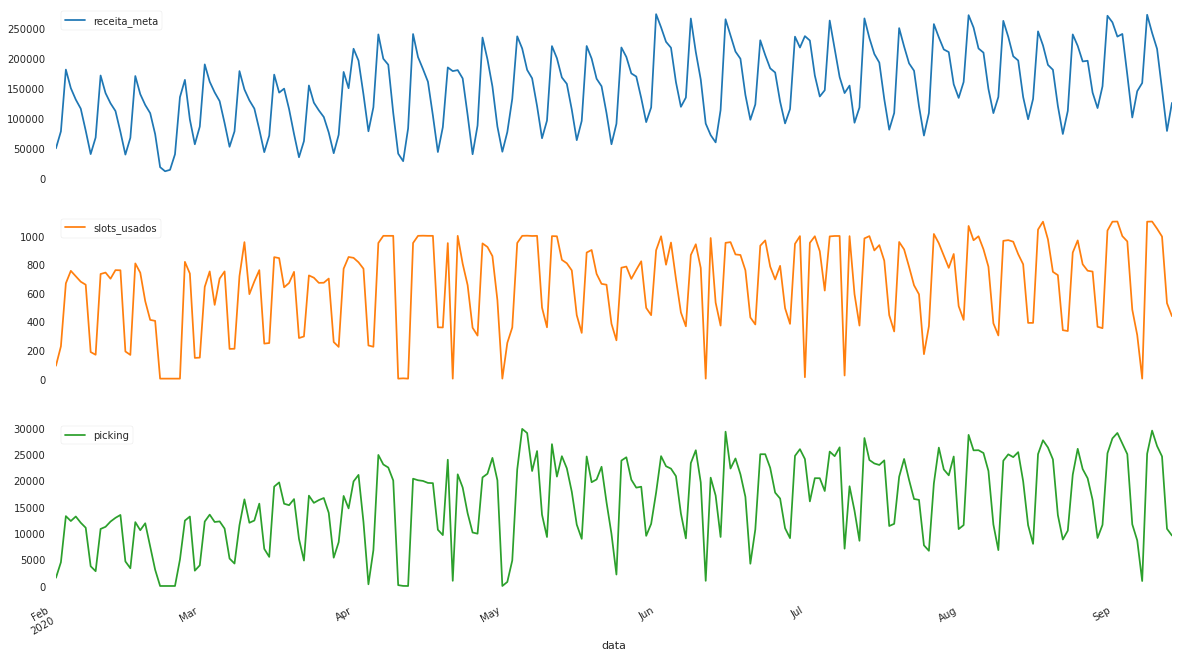

In [72]:
# -- plotando as séries
sp_ts.plot(subplots=True, figsize=(20,12))

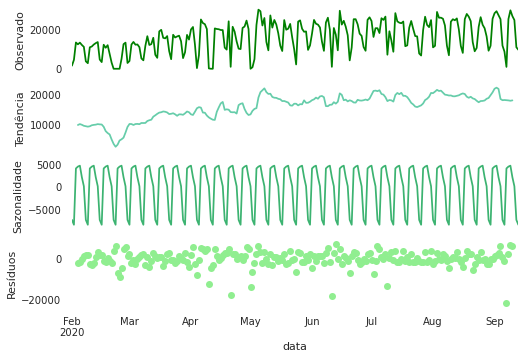

In [73]:
# -- decompondo as séries temporais - feature: picking
result = seasonal_decompose(sp_ts.picking)
fig, axes = plt.subplots(4, 1, sharex=True)
result.observed.plot(ax=axes[0], legend=False, color='g')
axes[0].set_ylabel('Observado')
result.trend.plot(ax=axes[1], legend=False, color='mediumaquamarine')
axes[1].set_ylabel('Tendência')
result.seasonal.plot(ax=axes[2], legend=False, color='mediumseagreen')
axes[2].set_ylabel('Sazonalidade')
result.resid.plot(ax=axes[3], legend=False, color='lightgreen', marker='o', linewidth=0)
axes[3].set_ylabel('Resíduos')
plt.show()

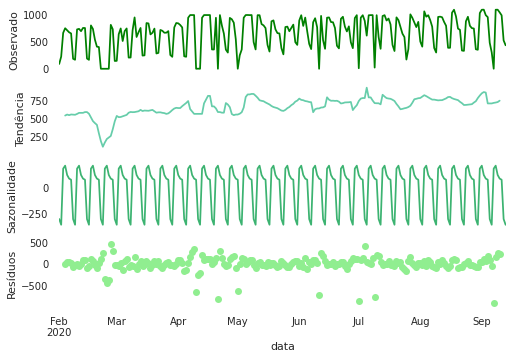

In [74]:
# -- decompondo as séries temporais - feature: slots_usados
result = seasonal_decompose(sp_ts.slots_usados)
fig, axes = plt.subplots(4, 1, sharex=True)
result.observed.plot(ax=axes[0], legend=False, color='g')
axes[0].set_ylabel('Observado')
result.trend.plot(ax=axes[1], legend=False, color='mediumaquamarine')
axes[1].set_ylabel('Tendência')
result.seasonal.plot(ax=axes[2], legend=False, color='mediumseagreen')
axes[2].set_ylabel('Sazonalidade')
result.resid.plot(ax=axes[3], legend=False, color='lightgreen', marker='o', linewidth=0)
[axes[3].set_ylabel('Resíduos'), 0]
plt.show()

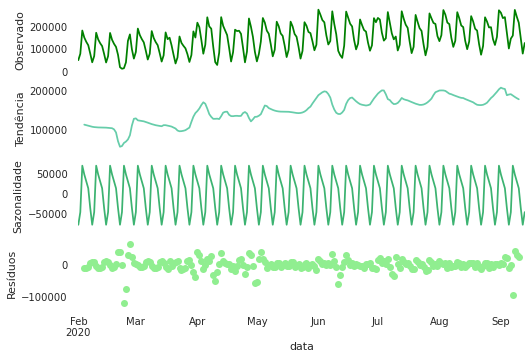

In [75]:
# -- decompondo as séries temporais - feature: receita_meta
result = seasonal_decompose(sp_ts.receita_meta)
fig, axes = plt.subplots(4, 1, sharex=True)
result.observed.plot(ax=axes[0], legend=False, color='g')
axes[0].set_ylabel('Observado')
result.trend.plot(ax=axes[1], legend=False, color='mediumaquamarine')
axes[1].set_ylabel('Tendência')
result.seasonal.plot(ax=axes[2], legend=False, color='mediumseagreen')
axes[2].set_ylabel('Sazonalidade')
result.resid.plot(ax=axes[3], legend=False, color='lightgreen', marker='o', linewidth=0)
axes[3].set_ylabel('Resíduos')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1cce5dbd0>,
      dtype=object)

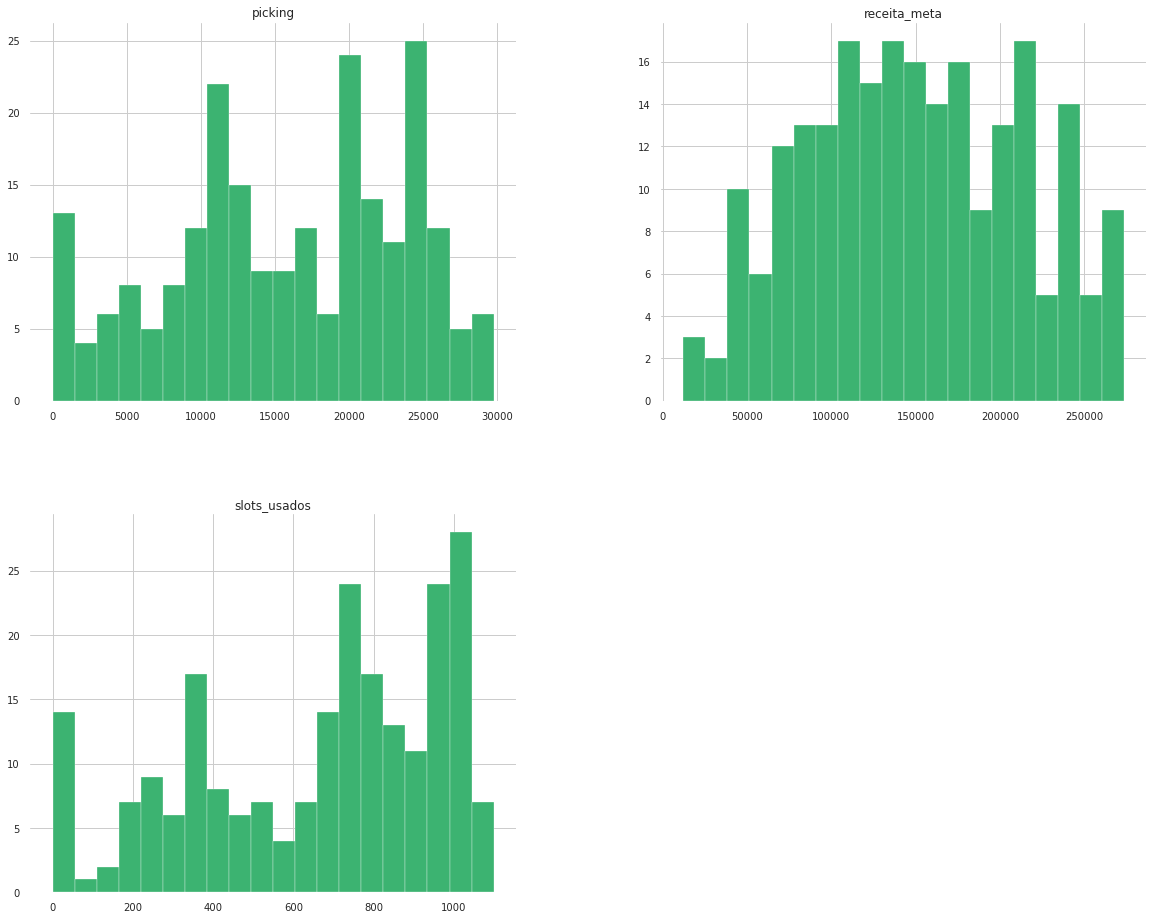

In [76]:
# -- Analisando o histpgrama das variáveis

sp_ts.hist(bins = 20, figsize=[20,16], color='mediumseagreen')

## Como trataremos os feriados?

### Primeiramente criaremos uma feature dummy que indicará se a data é feriado ou não

In [77]:
#Lista de feriados em str
lista_de_feriados_str = ['2020-02-22','2020-02-23','2020-02-24','2020-02-25','2020-04-10','2020-04-11','2020-04-12','2020-04-21','2020-05-01','2020-06-11','2020-09-07']
#transformar feriados em objetos datetime
def check_feriado(lista_de_feriados_str):
    feriados_dt = []
    for i in range(len(lista_de_feriados_str)):
        feriados_dt.append(datetime.strptime(lista_de_feriados_str[i], "%Y-%m-%d"))
    #Criando uma feature dummy onde 1 é feriado e 0 não é.
    mourato_ts['feriado'] = mourato_ts['data'].apply(lambda x: 1 if x in feriados_dt else 0)
    return feriados_dt
# Armazenando o resultado da função na variável feriados
feriados = check_feriado(lista_de_feriados_str)

### Além disso, torna-se importante também, saber o dia da semana, a semana e o mês em que ocorreu o feriado!

In [78]:
#Criação das features semana, dia_da_semana e mes de acordo com a data e aplicando as transformações necessárias
def dia_semana_mes(df):
    df['semana'] = df['data'].apply(lambda x: datetime.date(x).isocalendar()[1])
    df['dia_da_semana'] = df['data'].apply(lambda x: datetime.date(x).isocalendar()[2])
    df['mes'] = df['data'].apply(lambda x: x.month)
    return df
mourato_ts = dia_semana_mes(mourato_ts)
#Mostrando o dataframe após a inserção das novas features
mourato_ts.tail(2)

,data,receita_meta,slots_usados,picking,feriado,semana,dia_da_semana,mes
224,2020-09-12,79296.0,528.0,10844.0,0,37,6,9
225,2020-09-13,126045.0,437.0,9566.0,0,37,7,9


### Para resolver o problema, foi decidido utilizar uma heurística de aproximação para corrigir tais valores

In [97]:
#Heurística de substituição de valores de picking e slots_usado = 0 pelas respectivas médias semanais
def substituir_pela_media(df, cond, feature, freq):
    #Fazer a média de acordo com a freq da feature definida
    s = df[cond].groupby(freq)[feature].mean()
    #Aplicar no dataset a média com a freq da feature definida, negando a condição passada 
    df.loc[~cond, feature] = df[freq].map(s)
    return df

mourato_ts = substituir_pela_media(mourato_ts, mourato_ts['picking'] != 0, 'picking', 'semana')
mourato_ts = substituir_pela_media(mourato_ts, mourato_ts['slots_usados'] != 0, 'slots_usados', 'semana')

In [498]:
#Heurística de substituição de valores de slots_usado <= 80 pela média de slots_usado do dia da semana em que isto aconteceu
#Motivo: Encontramos diversos feriados que não deveriam ter slots_usados mas por algum motivo tinham
#Solução: Substituição dos valores pela média de slots_usados da semana  
#         e dos valores de picking pela media de picking da semana
#          Por causa que outliers afetam o modelo de maneira negativa
#          Além disso nossa amostra não é tão grande que pudessémos apenas dropar os valores
def substituir_pela_media_2(df, cond, feature1, feature2, freq):
    # Cálculo da média semanal de slots usados
    s2 = df[cond].groupby(freq)[feature1].mean()
    s3 = df[cond].groupby(freq)[feature2].mean()
    # Aplicar a média semanal do slots usados 
    df.loc[~cond, feature1] = df[freq].map(s2)
    df.loc[~cond, feature2] = df[freq].map(s3)
    return df

mourato_ts = substituir_pela_media_2(mourato_ts, mourato_ts['slots_usados'] >= 80, 'picking', 'slots_usados', 'semana')
mourato_ts = substituir_pela_media_2(mourato_ts, mourato_ts['picking'] >= 1000, 'picking', 'slots_usados', 'semana')

### Agora que o dataset já foi limpo e as heurísticas aplicadas, vamos começar a modelar!

In [98]:
from sklearn.preprocessing import MinMaxScaler
# Normalização das variáveis independentes, utilizadas como dados de entrada para treino do modelo
sc_in = MinMaxScaler(feature_range=(0, 1))
# Aqui se faz a criação das variáveis normalizadas
scaled_input = sc_in.fit_transform(mourato_ts[['picking','receita_meta']])
# As variáveis são transformadas em dataframe
scaled_input = pd.DataFrame(scaled_input)
# Troca-se o nome do dataframe para a variável desejada
X = scaled_input
# Ajuste de nome das colunas e reindexação de acordo com a data
X = X.rename(columns={0:'picking',1:'receita_meta',})
X = X.set_index(mourato_ts.data)

In [99]:
# Normalização da variável dependente, utilizada como dado de entrada para treino do modelo
sc_out = MinMaxScaler(feature_range=(0, 1))
# Realizar a transformação dos dados de entrada
scaler_output = sc_out.fit_transform(mourato_ts[['slots_usados']])
# A variável é transformada em DataFrame
scaler_output = pd.DataFrame(scaler_output)
# Troca-se o nome do dataframe para a variável desejada
y=scaler_output
# Ajuste de nome das colunas e reindexação de acordo com a data
y.rename(columns={0:'slots_usados'}, inplace=True)
y = y.set_index(mourato_ts.data)

In [100]:
#Normalização das variáveis de entrada para o modelo em produção!

from sklearn.preprocessing import MinMaxScaler
# Variável de entrada para normalização - para variáveis independentes
sc_in = MinMaxScaler(feature_range=(0, 1))
# Aqui se faz a criação das variáveis normalizadas
scaled_input = sc_in.fit_transform(predicao[['picking','receita_meta']])
# As variáveis são transformadas em dataframe
scaled_input = pd.DataFrame(scaled_input)
# Troca-se o nome do dataframe para a variável desejada
valores_futuros = scaled_input
# Ajuste de nome das colunas e reindexação de acordo com a data
valores_futuros = valores_futuros.rename(columns={0:'picking',1:'receita_meta',})
valores_futuros = valores_futuros.set_index(predicao.data)

### Chegou a hora em que é necessário dividir o dataset em treino e teste!
    Para series temporais, a ordem das observações é importantíssima
    e é necessário respeitar a temporalidade das observações!

In [101]:
# Separação do dataframe em treino (70%) e teste (30%).
# Importante notar que a reindexação é importante porque para séries temporais
# é necessário que o treino seja temporalmente antes do teste e da validação, caso necessário
train_size=int(len(mourato_ts) *0.7)
test_size = int(len(mourato_ts)) - train_size

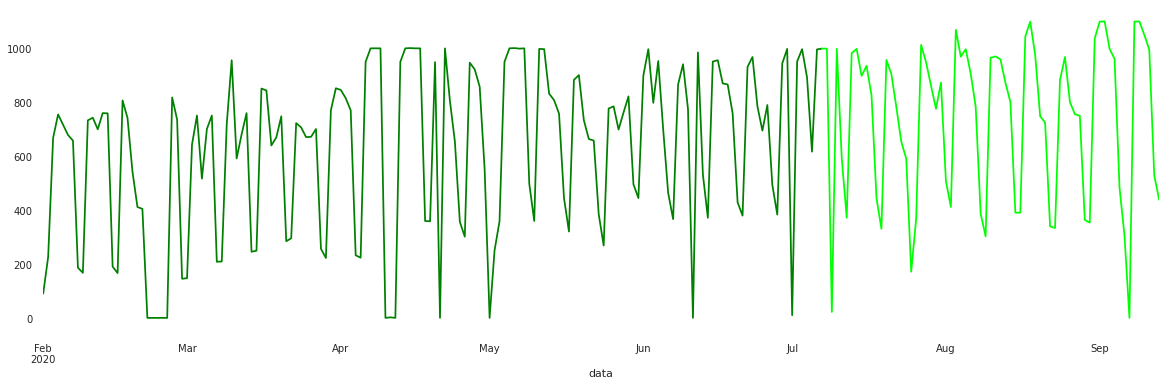

In [102]:
train_test_dist = sp_ts
train_test_dist['slots_usados'][:train_size].plot(color='green',figsize=(20,6))
train_test_dist['slots_usados'][train_size-1:].plot(color='lime',figsize=(20,6))
plt.show()

In [103]:
# Separação do dataframe em treino e teste e drop dos valores NaN
train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


<Figure size 720x360 with 0 Axes>

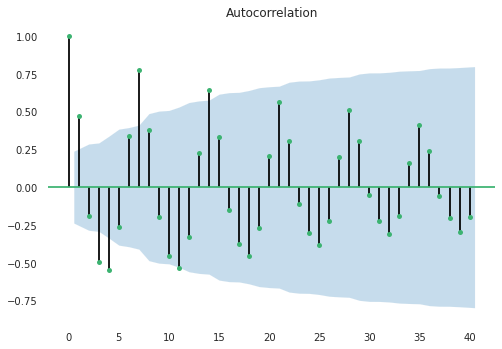

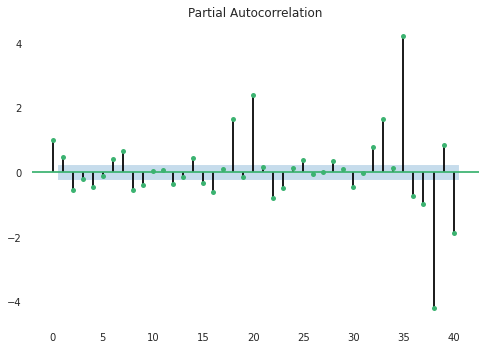

In [104]:
# Plotagem dos gráficos de Autocorrelação e Autocorrelação parcial
fig,ax= plt.subplots(1,0, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(test_X.receita_meta, lags=40, c='mediumseagreen')
fig=sm.tsa.graphics.plot_pacf(test_X.receita_meta, lags=40, c='mediumseagreen')
plt.show()

In [105]:
# O auto_arima é uma função que faz uma verificação de quais melhores parâmetros para um arima, sarima ou sarimax
# É um método mais inteligente que rodar uma simulação com todos os casos possíveis
# Decidimos utilizar o auto_arima depois de testar a força bruta.
from pmdarima import auto_arima

In [106]:
arima_model = auto_arima(train_y, exogenous=train_X, start_p=0, start_q=0, max_p=6, max_d=5, max_q=6, start_P=0,
                        D=1, start_Q=0, max_P=6, max_D=6, max_Q=6, m=7, seasonal=True, error_action='ignore', trace=True,
                        suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=-161.295, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=-177.817, Time=0.45 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=-204.761, Time=0.75 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=-163.294, Time=0.20 sec
 ARIMA(0,0,1)(0,1,0)[7] intercept   : AIC=-163.175, Time=0.14 sec
 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=-203.087, Time=0.78 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=-203.276, Time=1.57 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=-178.433, Time=0.30 sec


KeyboardInterrupt: 

In [107]:
# modelo antigo melhor ajuste (1,0,1)(0,1,1)[7] (com picking 95)
arima_model.summary()

NameError: name 'arima_model' is not defined

In [108]:
# Importando o modelo que decidimos por utilizar finalmente, que é o modelo SARIMAX, utilizando duas variáveis exógeneas
# os parâmetros do modelo SARIMAX foram os parâmetros indicados pelo auto_arima

from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_y, 
 exog=train_X,
 order=(1,0,1), seasonal_order=(0,1,1,7),
 enforce_invertibility=False, enforce_stationarity=False)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [109]:
# Treinando o modelo e vendo seu sumário
results = model.fit()
#results.summary()
# Pontos legais de observar: curtose próxima de 4 (indica normalidade), 
# skew próximo de 0 (indica dispersão da variância dos dados em torno do eixo y baixa)
# P > |z| para todas as variáveis bem baixo
# Melhor AIC de todos os testes

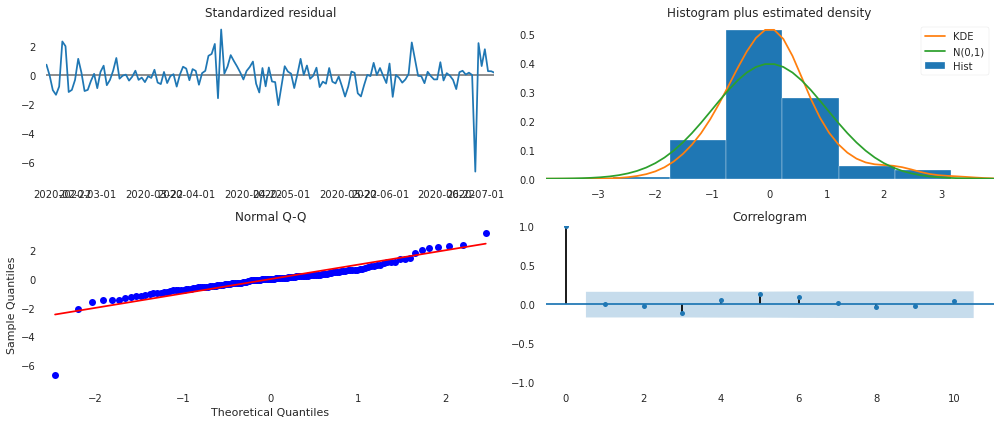

In [110]:
results.plot_diagnostics(figsize=(14,6))
plt.tight_layout()
plt.show()

In [111]:
# Fazendo a previsão para 69 períodos a frente
periodo_previsao = 69
pred = results.forecast(steps=periodo_previsao-1, exog = test_X)

### Agora que o modelo já foi treinado e estamos testando-o, torna-se necessário avaliá-lo!

In [112]:
# Para avaliar o nossoo modelo, utilizaremos 3 métricas: MSE, MAE e MAPE.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Cálculo do MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [113]:
# Transforma-se o resultado do forecast em um DataFrame pandas e renomeia a feature
pred.index = sp_ts[len(mourato_ts)-(periodo_previsao-1):].index
pred = pd.DataFrame(pred)
pred = pred.rename(columns={0:'previsto'})
pred.shape

(68, 1)

In [114]:
# Avaliando os erros do modelo para fins de análise de desempenho
print('-----------------------------------------------------------------------------------------------------')
print('SARIMAX Model MSE: {}'.format(mean_squared_error(test_y,pred)))
print('SARIMAX Model MAE: {}'.format(mean_absolute_error(test_y,pred)))
print('SARIMAX Model MAPE: {}'.format(mean_absolute_percentage_error(test_y,pred)))
print('-----------------------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------------------
SARIMAX Model MSE: 0.019212629878113126
SARIMAX Model MAE: 0.10098711345370248
SARIMAX Model MAPE: 60.87320518926038
-----------------------------------------------------------------------------------------------------


In [93]:
# Criação de um dataset para transformação final dos dados para retornar o resultado.
resultado = pred
resultado

,previsto
data,
2020-07-08,0.543952
2020-07-09,0.363087
2020-07-10,0.808630
2020-07-11,0.554917
2020-07-12,0.300756
...,...
2020-09-09,0.727919
2020-09-10,1.004091
2020-09-11,0.959184


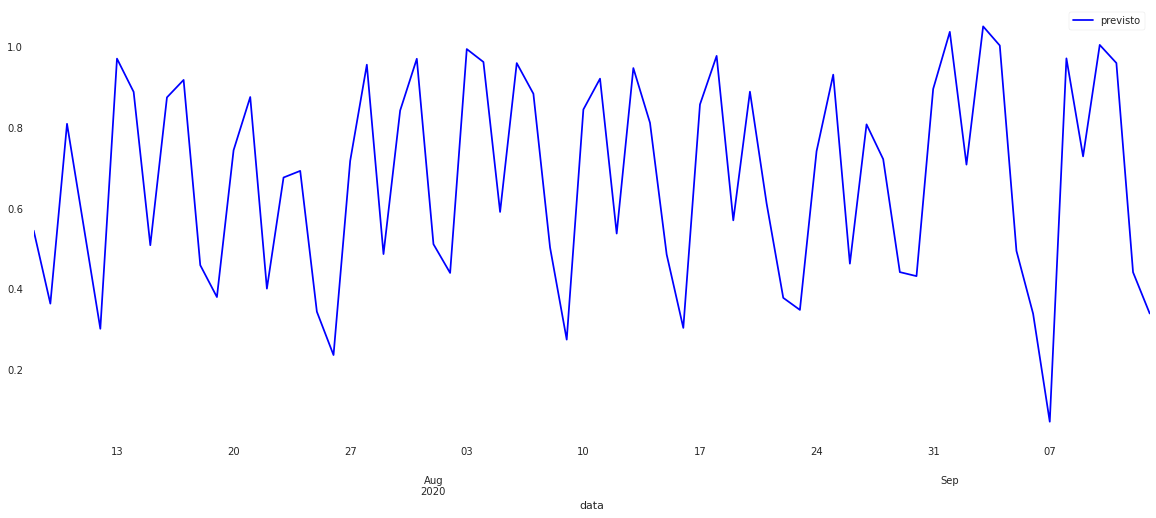

In [94]:
resultado['previsto'].plot(figsize=(20,8), legend=True,color='blue')

In [95]:
# Realizando a transformada inversa das variáveis para trazê-las para os números reais
A = sc_out.inverse_transform(resultado[['previsto']])

predict = pd.DataFrame(A).rename(columns={0:'predicted_slots'})


In [96]:
final_results = pd.concat([predict], axis=1)
final_results.index = resultado['previsto'].index
final_results

,predicted_slots
data,
2020-07-08,597.803013
2020-07-09,399.032699
2020-07-10,888.684695
2020-07-11,609.853766
2020-07-12,330.530810
...,...
2020-09-09,799.983155
2020-09-10,1103.496212
2020-09-11,1054.143691
